<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 5

_**Group Members:**_ Phillip Sievers, Gordon Liang, Jose Rivera 

### Problem 0 (3 points)

## Part 1: Stochastic Risk Minimization and The Bayes Classifier

In [63]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
def p_xy(x, y):
    assert np.isscalar(y), 'y must be a scalar'
    q = (3 - 2 * x) / 8 * np.sin(3 * np.pi * x / 2)
    if y == 1:
        z = 1/2 - x / 3 + q
    else:
        z = 1 - 2 * x / 3 - q
    return np.squeeze(z)

In [65]:
def plot_functions(x, functions, labels, font_size, show_boundary = False, title=None, margin=0.1):
    plt.figure(figsize=(8, 4), tight_layout=True)
    y_max = -np.inf
    for f, label in zip(functions, labels):
        y = f(x)
        plt.plot(x, y, label=label)
        y_max = np.maximum(y_max, np.max(y))
    plt.xlabel(r'$x$', fontsize=font_size)
    if len(labels) == 1 and title is None:
        plt.title(labels[0], fontsize=font_size)
    else:
        plt.legend(fontsize=font_size)
    if title is not None:
        plt.title(title, fontsize=font_size)
    if show_boundary:
        plt.vlines(0.155, -1, 5, colors='black', linewidth=0.8)
        plt.vlines(0.512, -1 , 5, colors='black', linewidth=0.8)
    plt.xlim(0, 1)
    plt.ylim(0, y_max + margin)
    plt.yticks(np.arange(0, y_max + 1), fontsize=font_size)
    plt.gca().tick_params(axis='both', labelsize=font_size)

### Problem 1.1 (Exam Style, Except for the Code)

$$
p_{XY}(x, y) = \left\{\begin{array}{ll}
\alpha(x) \left[\frac{1}{3} + \beta(x) \right] & \text{if}\; y = 1 \\
\alpha(x) \left[\frac{2}{3} - \beta(x) \right] & \text{if}\; y = 2
\end{array}\right.
$$

Since $y$ is discrete (either 1 or 2) it reduces our marginal $p_X(x)$ to the following: 
$$
\begin{align}
p_X(x) &= p_{XY}(x, 1) + p_{XY}(x, 2) \\
&= \alpha(x) \left[\frac{1}{3} + \beta(x) \right] + \alpha(x) \left[\frac{2}{3} - \beta(x) \right] \\
&= \frac{1}{3} \alpha(x) + \alpha(x) \beta(x) + \frac{2}{3} \alpha(x) - \alpha(x) \beta(x) \\
&= \alpha(x) \\
\text{Resubstituting gives} \\
&= \frac{3}{2} - x
\end{align}
$$

We use this to compute the conditional probabilities $p_{Y|X}(x, 1)$ and $p_{Y|X}(x, 2)$: 
$$
\begin{align}
p_{Y|X}(x, 1) &= \frac{p_{XY}(x, 1)}{p_X(x)} \\
&= \frac{\alpha(x) \left[\frac{1}{3} + \beta(x) \right]}{\alpha(x)} \\
&= \frac{1}{3} + \beta(x) \\
\text{Resubstituting gives us} \\
&= \frac{1}{3} + \frac{1}{4} \sin \frac{3 \pi x}{2}
\end{align}
$$
$$
\begin{align}
p_{Y|X}(x, 2) &= \frac{p_{XY}(x, 2)}{p_X(x)} \\
&= \frac{\alpha(x) \left[\frac{2}{3} - \beta(x) \right]}{\alpha(x)} \\
&= \frac{2}{3} - \beta(x) \\
\text{Resubstituting gives us} \\
&= \frac{2}{3} - \frac{1}{4} \sin \frac{3 \pi x}{2}
\end{align}
$$

We now want to solve $p_{Y|X}(x, 1) = p_{Y|X}(x, 2)$:
$$
\begin{align}
p_{Y|X}(x, 1) &= p_{Y|X}(x, 2) \\
\frac{1}{3} + \frac{1}{4} \sin \frac{3 \pi x}{2} &= \frac{2}{3} - \frac{1}{4} \sin \frac{3 \pi x}{2} \\
\frac{1}{2} \sin \frac{3 \pi x}{2} &= \frac{1}{3} \\
\sin \frac{3 \pi x}{2} &= \frac{2}{3} \\
\text{The sinus is periodic for the interval 2}\pi \\
\text{We are interested in } x \in [0, 1] \\
\\
\frac{3 \pi x}{2} &= \sin^{-1}\frac{2}{3} + 2\pi n \\
x_1 &= \frac{2}{3\pi} \sin^{-1}(\frac{2}{3}) + \frac{4n}{3} \\
\text{or}\\
\frac{3 \pi x}{2} &= \pi - \sin^{-1}\frac{2}{3} + 2\pi n \\
x_2 &= \frac{2}{3} - \frac{2}{3\pi} \sin^{-1}(\frac{2}{3}) + \frac{4n}{3} \\
\text{for }n &= 0 \\
x_1 &\approx 0.155\\
x_2 &\approx 0.512\\
\end{align}
$$
We do not get solutions in the interval for other $n$ 

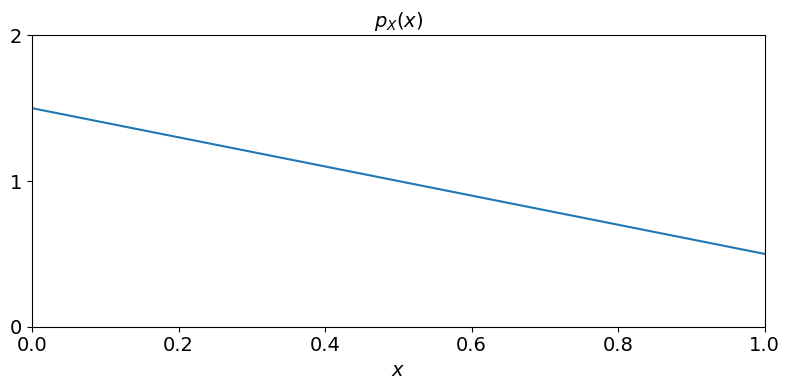

In [66]:
xx = np.linspace(0, 1, 300)
plot_font_size = 14

def psi(x):
    return 1/4 * np.sin(3 * np.pi * x / 2)

def p_X(x):
    return 3/2 - x

def p_YgX(x, y):
    if y == 1:
        z = 1/3 + psi(x)
    else: # y == 2
        z = 2/3 - psi(x)
    return np.squeeze(z)
        

plot_functions(
    xx, [lambda x: p_X(xx)], [r'$p_X(x)$'], plot_font_size
)

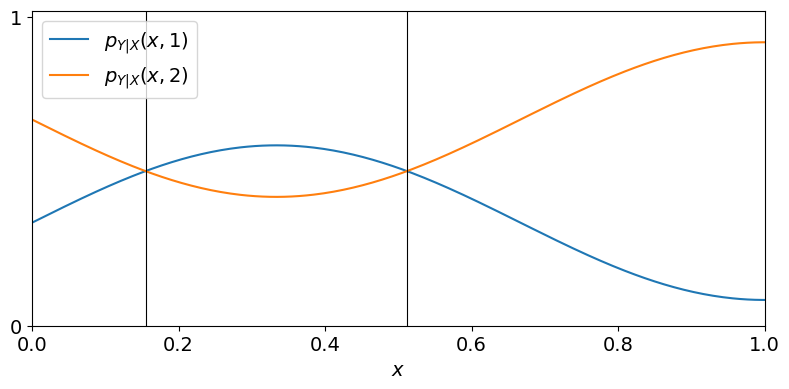

In [67]:
plot_functions(
    xx, [lambda x: p_YgX(xx, 1), lambda x: p_YgX(xx, 2)],
    [r'$p_{Y|X}(x, 1)$', r'$p_{Y|X}(x, 2)$'], plot_font_size, show_boundary=True
)

### Problem 1.2 (Exam Style Except for the Code)

We have the following bayesian classifier: 
$$
h^*(x) = \left\{\begin{array}{ll}
1 & \text{if }x \in \left[\frac{2}{3\pi} \sin^{-1}(\frac{2}{3}) + \frac{4n}{3}, \frac{2}{3} - \frac{2}{3\pi} \sin^{-1}(\frac{2}{3}) + \frac{4n}{3} \right] \text{for all } n  \\
2 & \text{otherwise.}
\end{array}\right.
$$

This then gives us the following bayesian classifier, for the given interval between 0 and 1: 
$$
h^*(x) = \left\{\begin{array}{ll}
1 & \text{if }x \in [0.155, 0.512] \\
2 & \text{otherwise.}
\end{array}\right.
$$

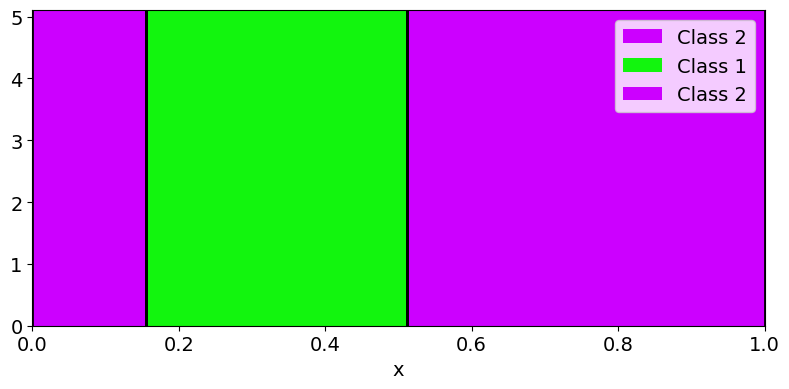

In [68]:

# maybe more progamatically with the functions? 
def get_boundary(n):
    r = 2/3*np.pi * np.arcsin(2/3)
    return (r + 4/3 * n ,2/3 - r + 4/3 * n)

def plot_regions(boundaries, font_size, labels=(2, 1), colors=("#CC00FF", "#12F50E"), show_boundary=False, title=None, margin=0.1):
    # boundaries should be a tuple/list of two boundary points
    # This creates three regions: [0, start], [start, end], [end, 1]
    plt.figure(figsize=(8, 4), tight_layout=True)
    regions = [(0, boundaries[0]), boundaries, (boundaries[1], 1)]
    
    i = 0
    for x_1, x_2 in regions:
        label = labels[i % 2]
        color = colors[i % 2]
        
        if show_boundary:
            plt.vlines(x_1, 0, 5 + margin, colors='black', linewidth=2)
            plt.vlines(x_2, 0, 5 + margin, colors='black', linewidth=2)

        plt.fill([x_1, x_2, x_2, x_1], 
                 [0, 0, 5 + margin, 5 + margin], 
                 color, label=f'Class {label}')
        i += 1

    plt.legend(fontsize=font_size)
    if title is not None:
        plt.title(title, fontsize=font_size)
    plt.xlim(0, 1)
    plt.ylim(0, 5 + margin)
    plt.xlabel('x', fontsize=font_size)
    plt.yticks(np.arange(0, 6), fontsize=font_size)
    plt.gca().tick_params(axis='both', labelsize=font_size)


plot_regions((0.155, 0.512), plot_font_size, show_boundary=True)

### Problem 1.3

In [69]:
from scipy.integrate import quad

In [70]:
boundaries = [0, 0.155, 0.512, 1]

def bayes_risk(boundaries):
    L_star = 0
    for i in range(len(boundaries)-1):
        x_1, x_2 = boundaries[i], boundaries[i+1]
        if i % 2 == 0: # class 2 
            l, error = quad(lambda x: p_xy(x, 1), x_1, x_2)
        else: # class 1
            l, error = quad(lambda x: p_xy(x, 2), x_1, x_2)
        L_star += l
    return L_star
        
risk = bayes_risk(boundaries)
print(f"risk: {risk:.3f}")

risk: 0.378


### Problem 1.4 (Exam Style)

#### Answer 

Risk is not zero because Bayesian classifier returns most probable value of y at each x.

However, at every x, there are two possible values of y, with nonzero probability.

Therefore, there must be some loss due to the less likely y values occuring.

### Problem 1.5

In [71]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [72]:
def retrieve(file_name, semester='fall25', homework=5):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [73]:
file_name = 'samples.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    samples = pickle.load(file)

Using previously downloaded file samples.pkl


In [74]:
import sklearn.neighbors as nb
import sklearn.linear_model as lm
import sklearn.metrics

nn = nb.KNeighborsClassifier(n_neighbors=100)
lg = lm.LogisticRegression()

def create_pred_space(model, data, x_range=[0,1],n_points=100):
    x_grid = np.linspace(x_range[0], x_range[1], n_points)
    x_grid_col = x_grid.reshape(-1, 1)  # Reshape for sklearn

    predictions = model.predict(x_grid_col)
    
    return x_grid, predictions


def visualize_1d_classifier(model, data):
    
    plt.figure(figsize=(10, 6))
    x_grid, predictions = create_pred_space(model, data)
    current_label = predictions[0]
    start_x = x_grid[0]
    
    colors=("#CC00FF", "#12F50E")
    color = 1
    for i in range(1, len(predictions)):
        if predictions[i] != current_label or i == len(predictions) - 1:
            end_x = x_grid[i] if predictions[i] != current_label else x_grid[-1]

            plt.axvspan(start_x, end_x, color=colors[color], 
                       label=f'Class {current_label}')
            color = (color + 1 )% 2
            
            start_x = x_grid[i]
            current_label = predictions[i] if i < len(predictions) else current_label
    
    plt.xlabel('x')
    plt.ylabel('Class')
    plt.title('1D Classifier Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


def evaluate(model, data, train_model=True):
    train = data['train']
    test = data['test']
    train_x = train['x']
    train_y = train['y']
    test_x = test['x']
    test_y = test['y']
    if train_model:
        model.fit(train_x, train_y)
    training_accuracy = sklearn.metrics.accuracy_score(train_y, model.predict(train_x))
    testing_accuracy = sklearn.metrics.accuracy_score(test_y, model.predict(test_x))
    print(f'Training accuracy: {round(training_accuracy, 3)}')
    print(f'Testing accuracy: {round(testing_accuracy, 3)}')
    # for task 3
    return testing_accuracy


In [75]:
print('Nearest Neighbor with n=100')
_ = evaluate(nn, samples)

Nearest Neighbor with n=100
Training accuracy: 0.621
Testing accuracy: 0.611


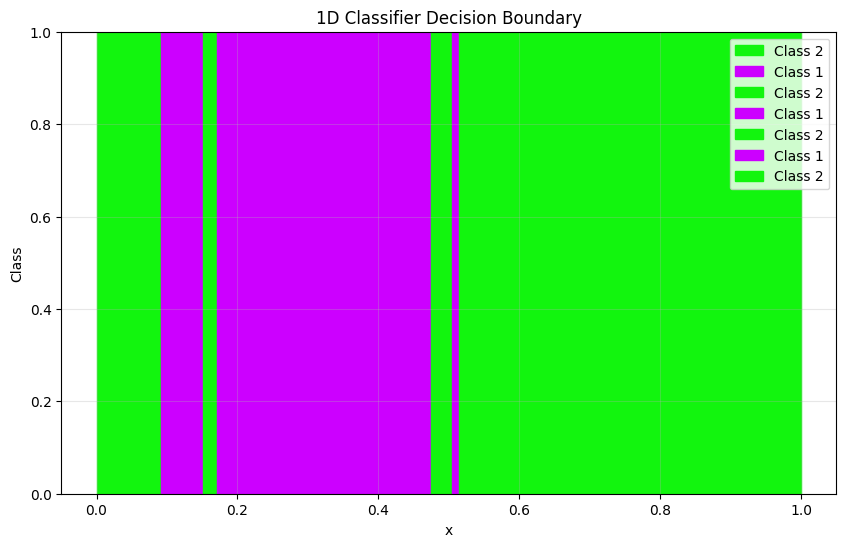

In [76]:
visualize_1d_classifier(nn, samples)

In [77]:
print('Softmax Classifier')
_ = evaluate(lg, samples)

Softmax Classifier
Training accuracy: 0.547
Testing accuracy: 0.545


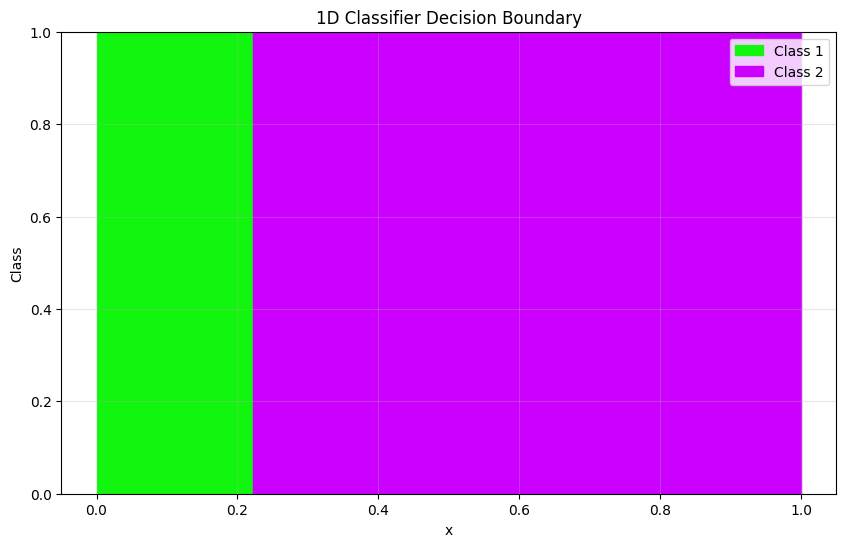

In [78]:
visualize_1d_classifier(lg, samples)


In [79]:
class BayesianClassifier:
    def __init__(self):
        self.x_1 = 0.155
        self.x_2 = 0.512
    
    def predict(self, ar_x):
        predictions = np.zeros(len(ar_x))
        for i, x in enumerate(ar_x):
            if self.x_1 <= x <= self.x_2:
                predictions[i] = 1
            else:
                predictions[i] = 2
        return predictions
        
bc = BayesianClassifier()
_ = evaluate(bc, samples, train_model=False)

Training accuracy: 0.623
Testing accuracy: 0.62


### Problem 1.6 (Exam Style)

#### Answer 

> 1. How well does the 100-NN classifier perform, compared to the Bayes classifier?

It performs nearly as good. 100-NN achieves 0.611, almost as good as Bayes' 0.62; achieved 0.98 of its accuracy.

> 2. How well does the softmax classifier perform, compared to the Bayes classifier?

It performs comparatively poor. Softmax achieves 0.545, worse than Bayes' 0.62; achieved 0.88 of its accuracy.

> 3. One of the two classifiers above does relatively poorly. What is the fundamental reason for that?

The softmax does so poorly because the data is not linearly seperable. Actually it is the quite opposite, wildy mixed and most of the type 1 classes bundled between the type 2 classes. The softmax can not account for that.

> 4. What is the theoretical relation between the Bayes risk L* and its accuracy on an infinitely large test set? Does that relationship hold, approximately, for the test set in your experiments?

The theoretical L* should match the real computed risk for an infinite test set. We computed the theoretical accuracy of the Bayesian Classifier to be approx 0,622 and we only perform worse by 2% on the real data.

> 5. Why can the Bayes classifier not be computed for a realistic machine learning scenario?

p_y_given_x is hard to determine and estimate. curse of dimensionality, sparse data. T can be fluke of p. For realistic machine learning we have data taken out of the real world and therefore we cant know the underlying true data distribution.

## Part 2: Validation 

### Problem 2.1 (Exam Style)

$k=1$

$$
\begin{array}{c|c|c|c|c}
m & x_m & y_m & h(x_m) & l \\\hline
1 & 0 & 6 & 6 & 0 \\
2 & 5 & 6 & 18 & 144 \\
3 & 12 & 12 & 6 & 36
\end{array}
$$

$$
\text{Validation Risk: } L_V(1) = 60
$$

$k=2$

$$
\begin{array}{c|c|c|c|c}
m & x_m & y_m & h(x_m) & l \\\hline
1 & 0 & 6 & 12 & 36 \\
2 & 5 & 6 & 12 & 36 \\
3 & 12 & 12 & 9 & 9
\end{array}
$$

$$
\text{Validation Risk: } L_V(2) = 27
$$

$k=3$

$$
\begin{array}{c|c|c|c|c}
m & x_m & y_m & h(x_m) & l \\\hline
1 & 0 & 6 & 10 & 16 \\
2 & 5 & 6 & 10 & 16 \\
3 & 12 & 12 & 12 & 0
\end{array}
$$

$$
\text{Validation Risk: } L_V(3) = 10.667
$$

$\hat{k}=3$ because $L_V(3) = 10.667$ has lowest risk.

### Problem 2.2 (Exam Style)

#### Answer

We are assuming we ignore $V$ instead of merging the set back into $T$, we cant tell if this was clearly stated in the task

> 1. How many loss values (not risk values) would you need to compute? Justify your answer briefly.

For each $k$ that we choose we will run Cross Validation on $T$ so that each datapoint will be used for validation once per $k$. That means that we compute the Validation loss once per Datapoint so a total of 4 times and that for 3 different $k$ which brings the total computations to 12.

> 2. How many if you were to use 2-fold cross validation instead?

For each $k$ we would use half the set for Validation, which is 2 elemnts. This means we agains compute 4 losses per $k$. For the three distinct $k$ we get a total of 12 computations

### Problem 2.3 (Exam Style)

#### $k=1$

We are computing the LOOCV for $T$ 

$$
\begin{array}{c|c|c|c|c}
n-1 & x_{n-1} & y_{n-1} & h_{n-1}(x_{n-1}) & \text{loss} \\\hline
1 & 1 & 6 & 18 & 144 \\
2 & 5 & 18 & 6 & 144 \\
3 & 13 & 6 & 12 & 36 \\
4 & 15 & 12 & 6 & 36 \\
\end{array}
$$

$$
\begin{align}
\text{LOOCV average risk}:\;\;\; \hat{L} &= (144 + 144 + 36 + 36)/4 \\
&= 90 \\
\text{LOOCV empirical variance}:\;\;\; \hat{\sigma}^2 &= 1/3 \cdot \left[2(144-90)^2 + 2(36-90)^2 \right] \\
&= 1/3 \cdot (4 \cdot 54^2) = 3,888
\end{align}
$$

## Part 3: Interpret Cross-Validation with Care

In [80]:
file_name = 'mnist.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    mnist = pickle.load(file)

Using previously downloaded file mnist.pkl


### Problem 3.1

In [81]:
import sklearn.model_selection as model_selection

nn_model = nb.KNeighborsClassifier()
parameters = {'n_neighbors': [1 ,3 , 5, 7, 9]}
optimized_nn = model_selection.GridSearchCV(nn_model, parameters, cv=30)

_ = evaluate(optimized_nn, mnist)


Training accuracy: 1.0
Testing accuracy: 0.91


In [82]:
import pandas as pd

results = pd.DataFrame(optimized_nn.cv_results_)
score_report = results[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

score_report

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.913297,0.015304,1
1,3,0.911297,0.014835,4
2,5,0.912195,0.014874,2
3,7,0.911696,0.014808,3
4,9,0.909097,0.015846,5


In [83]:
print("Manual Testing of the Parameters:")
man_t_acc = []
for n in parameters['n_neighbors']:
    manual_nn = nb.KNeighborsClassifier(n)
    print(f"For n = {n} we get the results:")
    testing_acc = evaluate(manual_nn, mnist)
    man_t_acc.append(testing_acc)
    print('')

Manual Testing of the Parameters:
For n = 1 we get the results:
Training accuracy: 1.0
Testing accuracy: 0.91

For n = 3 we get the results:
Training accuracy: 0.953
Testing accuracy: 0.914

For n = 5 we get the results:
Training accuracy: 0.941
Testing accuracy: 0.915

For n = 7 we get the results:
Training accuracy: 0.934
Testing accuracy: 0.912

For n = 9 we get the results:
Training accuracy: 0.927
Testing accuracy: 0.909



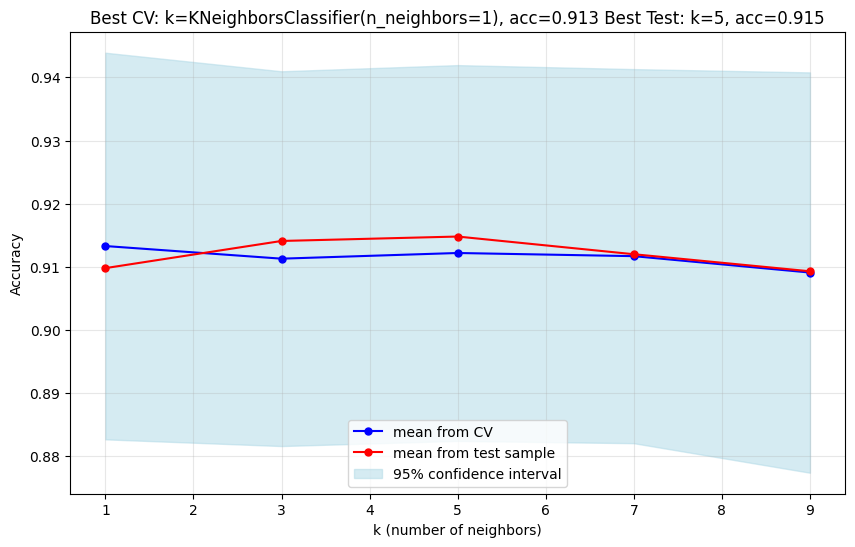

In [84]:
### 95% confidence is 2 standard deviations
### see https://en.wikipedia.org/wiki/Standard_deviation

x = parameters['n_neighbors']
y_manual = man_t_acc
y_cv = score_report['mean_test_score']
stds_cv = score_report['std_test_score']


plt.figure(figsize=(10, 6))
plt.plot(x, y_cv, label='mean from CV', color='blue',
         marker='o', markersize=5, markerfacecolor='blue')
plt.plot(x, y_manual, label='mean from test sample', color='red', 
         marker='o', markersize=5, markerfacecolor='red')


ci_lower = y_cv - 2*stds_cv
ci_upper = y_cv + 2*stds_cv
plt.fill_between(x, ci_lower,
                 ci_upper,label='95% confidence interval', color='lightblue', alpha=0.5)

plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title(f'Best CV: k={optimized_nn.best_estimator_}, acc={max(score_report['mean_test_score']):.3f} Best Test: k={5}, acc={0.915:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Problem 3.2 (Exam Style)

1. no, CV gives k hat = 1, test gives k hat = 5.
2. yes, test scores is usu > cv scores, due to more training data
3. prefer test k hat = 5. given std, CV and test scores are consistent. so take test scores, more training data, and separate test set.
4. strong clustering of handwritten digits. very likely many same digits nearer a given digit than a different one. y_hat only changes when majority changes, so classifier is resilient to occasional wrong different digits as neighbors. so k doesnt have major effect because accuracy is already high.

## Part 4: Regularization and the Bootstrap

### Problem 4.1

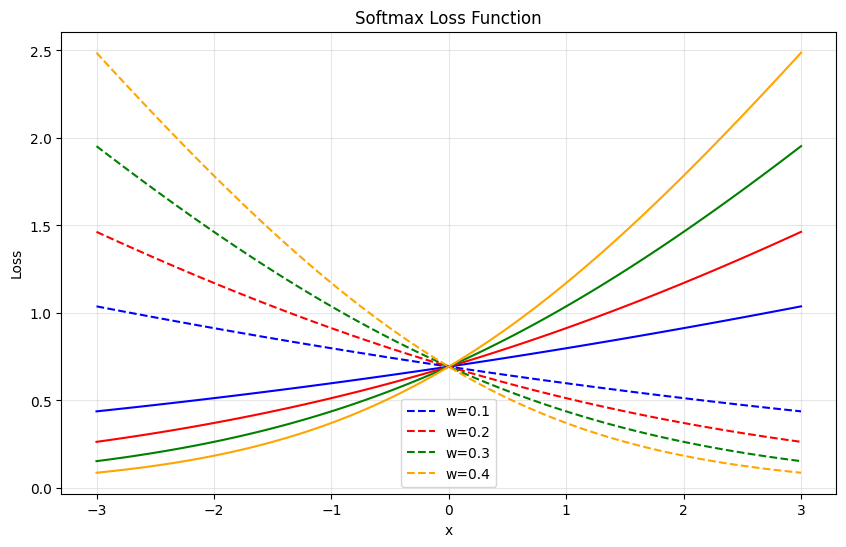

In [85]:
def a(w, x, n):
    if n == 1:
        return w*x
    if n == 2:
        return -w*x

def l(y, w, x):
    return np.log(np.exp(a(w,x, 1)) + np.exp(a(w,x, 2))) - a(w,x, y)
    
Y = [1, 2]
W = [0.1, 0.2, 0.3, 0.4]
X = np.linspace(-3, 3, 100)

plt.figure(figsize=(10,6))
colors = ['blue', 'red', 'green', 'orange']
for i, w in enumerate(W):
    color = colors[i]
    plt.plot(X, l(Y[0], w, X), color=color, linestyle='--', label=f'w={w}')
    plt.plot(X, l(Y[1], w, X), color=color, linestyle='-')

plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Softmax Loss Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Problem 4.2 (Exam Style)

#### Answer

> 1. For a linearly separable training set $T$ as characterized above, does the plot you made in the previous problem indicate that the risk $L_T(w)$ is an increasing or a decreasing function of $w$, given that $w > 0$ ? Justify your answers.

$T$ is linearly separable, so a decision boundary can classify all points correctly.

so portion of curves $x\leq 0$ matters for $y=1$, and $x>0$ matters for $y=2$

for these portions, $w_1 > w_2 \implies l(y,a([w_1,-w_1],x)) < l(y,a([w_2,-w_2],x))$

since risk is a monotonic increasing function w.r.t each loss, and loss is monotonic decreasing w.r.t $w$,

$L_T(w)$ is a monotonic decreasing function.

> 2. Show that $L_T(\infty) = \lim_{w\rightarrow\infty} L_T(w)$ for a training set $T$ as characterized above.

$$
\begin{align}
\lim_{w \rightarrow \infty}L_T(w)
&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty}\log(e^{a_1(x_n)}+e^{a_2(x_n)})-a_{y_n}(x_n) \\

&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty} \log(e^{-wx_n}+e^{wx_n})+
\begin{cases}
wx_n & y=1,x<0\\
-wx_n & y=2,x>0 \\
\end{cases}\\

&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty} 
\begin{cases}
\log(e^{-wx_n}+0)+wx_n & y=1,x<0\\
\log(0+e^{wx_n})-wx_n & y=2,x>0 \\
\end{cases}\\

&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty} 
\begin{cases}
-wx_n+wx_n & y=1,x<0\\
wx_n-wx_n & y=2,x>0 \\
\end{cases}\\

&=0 

& \\
\text{with the same logic,} \\
L_T(\infty) &= \frac{1}{N}\sum_{n=1}^N\log(e^{-\infty x} + e^{\infty x}) -\infty \\ 
&= \frac{N\cdot \log(e^{-\infty x} + e^{\infty x}) - \infty}{N} \\ 
&= \log(e^{-\infty x} + e^{\infty x}) - \infty  \\
&= \infty - \infty
&= \infty-\infty = 0
\\
\text{We have shown that } L_T(\infty) &= \lim_{w\rightarrow\infty} L_T(w) \\
\end{align}
$$s

### Problem 4.3

In [86]:
from sklearn.linear_model import LogisticRegression

def softmax_classifier(t, c):
    return LogisticRegression(C=c, max_iter=1000, random_state=3).fit(t['x'], t['y'])

In [87]:
c_set = np.linspace(0.0002, 1, 10)
K = 5

def bootstrap(c_set, t, k):
    L_min = np.inf
    for c in c_set:
        s_1, s_2 = 0, 0
        for _ in range(k):
            # Draw(T)
            n_samples = len(t['x'])
            bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
            bs_train_x = t['x'][bootstrap_indices]
            bs_train_y = t['y'][bootstrap_indices]
            bag = {'x': bs_train_x, 'y': bs_train_y}
            
            # V = T\B
            remaining_indices = np.setdiff1d(np.arange(n_samples), bootstrap_indices)
            validation_set_x = t['x'][remaining_indices]
            validation_set_y = t['y'][remaining_indices]
            
            h = softmax_classifier(bag, c)
            
            # L = L_V(h)
            validation_risk = 1 - sklearn.metrics.accuracy_score(validation_set_y, h.predict(validation_set_x))
            s_1, s_2 = s_1 + validation_risk, s_2 + validation_risk**2
        
        L_curr = s_1/k
        if L_curr < L_min:
            variance = (s_2 - s_1**2/k)/(k-1)
            c_best = c
            L_min = L_curr
            var_best = variance
    h_best = softmax_classifier(t, c_best)
    return h_best, c_best, L_min, var_best

h_best, c_best, L_min, var_best = bootstrap(c_set, mnist['train'], K)

In [88]:
print(f"Bootstrap found c = {c_best} to be the best hyperparameter")
_ = evaluate(h_best, mnist)


Bootstrap found c = 0.1112888888888889 to be the best hyperparameter
Training accuracy: 0.975
Testing accuracy: 0.905


#### Answer

> 1. Does the predictor overfit? How can you tell?

It does not overfit strongly. We only lose 7% accuracy on the test set, which is significatnly larger than our training set. We would expect a lot bigger drop in accuracy if we overfitted strongly.

Because our training set is a lot larger than our test set we can conclude that we dont overfit strongly, even though we achieve near perfect scores on the test set just because we also generalize extremely well for a lot of never seen before data.


> 2. How many times was a predictor trained in your call of `bootstrap`?

It was trained 5 times per $c$ we tried. We had a total of $10$ items in `c_set` therefore a total of 50 fittings.

> 3. With $C = 1$, we obtained perfect training accuracy and a test accuracy of 0.860 in Homework 4. Did picking a value of $C$ with the boostrap help where it matters? Justify your answer very briefly.

Yes it mattered. We improved accuracy by 4.5% on the test set, the set that matters to us. We perform better across the board and generalize better. We do not overfit to the training data anymore.



### Problem 4.4 (Exam Style)

#### Answer 

1. $(1-p)^K$
2. $B(K, p, k\ge1) = \sum^K_{k=1} {K\choose1} \cdot p^k \cdot (1-p)^{K-k}=1-(1-p)^K$
3. $B(K, (1-p), k\ge1) = \sum^K_{k=1} {K\choose1} \cdot (1-p)^k \cdot p^{K-k}=1-p^K$